# Tensile Testing of Polymer Dog Bone Samples

### This tutorial will show you some basics of how to use Python Jupyter Notebooks to plot and analyze your data.  Python is a free and widely utilized language for data science and is increasingly used by engineers. 

In [1]:
# In Python, rather than write 1000's of lines of code to do something, you can call up libraries of packages that will do what you need.
import pandas as pd #this allows you to make nice tables 
import numpy as np #these are basic math functions
import matplotlib.pyplot as plt #this is the simple plotting library
import statsmodels.formula.api as smf #this is the library to use for plot fitting


In [2]:
# Import Data from a csv file  first you name your data table you want to make (called a data frame). Here I use df
df=pd.read_csv('PLA1.csv')
df  #this calls the data table

,Time,Displacement,Force
0,0.000,0.0000,0.0002
1,0.001,0.0000,0.0002
2,0.002,0.0000,0.0002
3,0.003,0.0000,0.0001
4,0.004,0.0000,0.0001
5,0.005,0.0000,0.0001
6,0.006,0.0000,0.0001
7,0.007,0.0000,0.0001
8,0.008,0.0000,0.0001
9,0.009,0.0000,0.0001


#### Notice that there are almost 200K rows of data from the tensile tester.  This is why we no longer want to use Excel for plotting data. You need something more powerful/faster than Excel. 

## Plotting Data

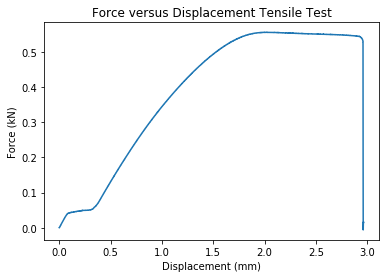

In [3]:
x_Tensile = df['Displacement']  #here you make the x variable by selcting the column you want fromt the data frame.
y_Tensile= df['Force'] #here you make the y variable
 
plt.plot(x_Tensile, y_Tensile) #here you call the plotting program and plot x and y
plt.title('Force versus Displacement Tensile Test')# this makes a title on the plot
plt.xlabel('Displacement (mm)')#this makes the x label
plt.ylabel('Force (kN)') #this makes a y label
plt.savefig('fullPLA.png', bbox_inches='tight')#this saves (exports)a png of the plot. You could also jpg

#### This is a full plot of the data. As you can see, it has several features of note. The first small "hump" in the data is the machine tensioning the sample. Since the sample is a polymer, it first puts a load on the 3D sample and then the material itself starts to tension. This is what you see in the linear region from abouut 0.05 kN to 0.5 kN.  After that the same starts to yield as evidenced by the deviation from the linear elastic region. After that the same just breaks after a displacement of about 2.7 mm.  This is just the force versus displacment graph.

### Changing Data from Force versus Displacement to Stress versus Strain

####  If you remember your 3010 Class, you may recall that stress = F/A, and strain = displacement/length. For this you need to measure the actual printed dogbone to calculate the sample parameters.

#### For this particular sample - Total length was 115 mm,  width at center was 6 mm and thickness was 3 mm. 

In [4]:
# to start, I will make 2 new columns, stress and strain
Stress = df['Force']/18 #this is force/area
Strain = ((df['Displacement']+115)/115)-1 #this is deltaL/L

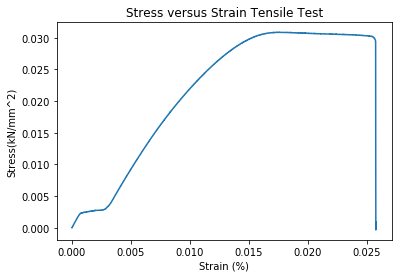

In [5]:
plt.plot(Strain, Stress) #here you call the plotting program and plot x and y
plt.title('Stress versus Strain Tensile Test')# this makes a title on the plot
plt.xlabel('Strain (%)')#this makes the x label
plt.ylabel('Stress(kN/mm^2)') #this makes a y label units are kN/mm^2. 1 kN/mm^2 is 1000 MPa. 
plt.savefig('StressStrainPLA.png', bbox_inches='tight')#this saves (exports)a png of the plot. You could also jpg

#### This looks pretty good. From this we want to be able to read the UTS, and we also need to extract out the linear portion so we can plot and fit that to determine the elastic modulus

#### Just to make out lives easier - we are going to convert everything over to MPa

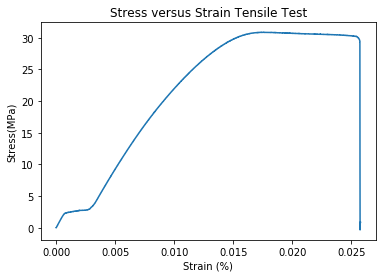

In [6]:
Stress = Stress*1000
plt.plot(Strain, Stress) #here you call the plotting program and plot x and y
plt.title('Stress versus Strain Tensile Test')# this makes a title on the plot
plt.xlabel('Strain (%)')#this makes the x label
plt.ylabel('Stress(MPa)') #cpnverted units 
plt.savefig('StressStrainPLA_MPa.png', bbox_inches='tight')#this saves (exports)a png of the plot. You could also jpg

### Find the UTS

In [7]:
#make a new data frame for the new data
df2 = pd.DataFrame({'Stress':Stress,'Strain':Strain})#here you name the column and add the variable string
# Get a series containing maximum value of each column
maxValuesObj = df2.max()
print('Maximum value in each column : ')
print(maxValuesObj)

Maximum value in each column : 
Stress    30.877778
Strain     0.025788
dtype: float64


### Find the Elastic Modulus

#### For this we only want to extract the linear region, probably the chunk between 0.5 MPa and 20 MPa. This should be enough to give us a decent fit.

In [8]:
# I can do this by making a new dataframe and find the index of all values for stress within this range
df3 = df2[(df2['Stress'] >= 5) & (df2['Stress'] <= 20)]
df3

,Stress,Strain
25153,5.000000,0.003627
25154,5.000000,0.003627
25155,5.000000,0.003627
25156,5.000000,0.003627
25157,5.000000,0.003627
25158,5.000000,0.003627
25159,5.000000,0.003627
25160,5.000000,0.003628
25161,5.000000,0.003628
25162,5.000000,0.003628


#### This looks okay, but I have two blocks of data here, owing to the data collection after the material failed (going up and going down. At least this gives me the indexes I need to use for the linear region. I can pull data from index location 25153 to 62797. To do this I can use a technique called slicing

####  Slicing using the [] operator selects a set of rows and/or columns from a DataFrame. To slice out a set of rows, you use the following syntax: data[start:stop]. When slicing in pandas the start bound is included in the output. The stop bound is one step BEYOND the row you want to select. 

In [9]:
df4 =df2[25153:62797] #this slicees all columns between the values I want. I am not showing the table here

### Linear Regression Fit and Plots

#### Using Statsmodel (https://www.statsmodels.org/stable/index.html) I set up the model using the dependent (Stress) and independent (Strain)and the data frame used for the calculations. 

In [10]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Stress ~ Strain', data=df4)
model = model.fit()
model.params

Intercept      -4.571253
Strain       2758.740398
dtype: float64

#### Taking the output of the function above, I can write a new variable I call fit, and this variable can be plotted against the original data to see the goodness of fit.

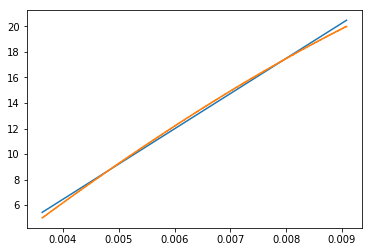

In [11]:
fit = (df4['Strain']*2758.740398) - 4.571253 #This is the y =mx + b function for the fit
strainL = df4['Strain']# this makes my x variable
stressL=df4['Stress'] #this makes my y varaible
plt.plot(strainL, fit) #plotting the fit
plt.plot(strainL, stressL)# Plotting the original data


####  From this, you can see the goodness of fit.  The slope is the elastic modulus of the material. In this case it would be 2.75 GPa (2758 MPa).  The material is PLA and MatWeb (http://www.matweb.com/search/DataSheet.aspx?MatGUID=ab96a4c0655c4018a8785ac4031b9278&ckck=1)has listed an avergae value of 2.91 GPa.  This is within the range expected.

#### A shorter way to do this is to use a function in statsmodel (the predition called model) and name it so it can be plotted

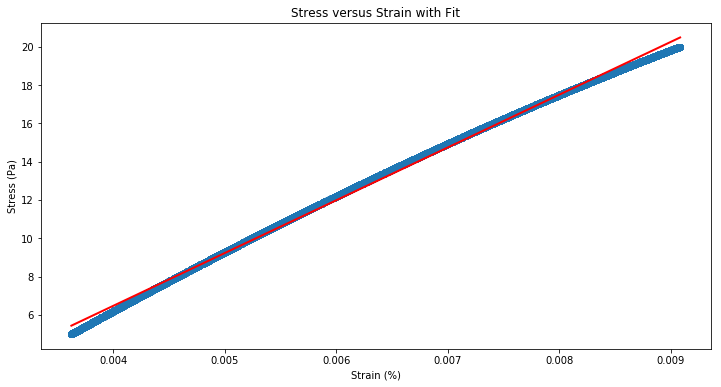

In [17]:
Elastic = model.predict()#creates the regression line for fitting

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df4['Strain'], df4['Stress'], 'o')           # scatter plot showing actual data
plt.plot(df4['Strain'], Elastic, 'r', linewidth=2)   # regression line
plt.xlabel('Strain (%)')
plt.ylabel('Stress (Pa)')
plt.title('Stress versus Strain with Fit')
plt.savefig('E_Fit_Pla.png', bbox_inches='tight')
plt.show()

#### You can see from this model, you get the same fit as plotting it by hand

#### You can also create a statistical summary for the data set

In [16]:
print(model.summary())# This prints a summary of the model for the fit

                            OLS Regression Results                            
Dep. Variable:                 Stress   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.700e+07
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:00:55   Log-Likelihood:                 6341.7
No. Observations:               37644   AIC:                        -1.268e+04
Df Residuals:                   37642   BIC:                        -1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5713      0.004  -1043.356      0.0